<a href="https://colab.research.google.com/github/charris561/Discrete-Structures/blob/main/Projects/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 2150 Computer Project 4: Order of Growth of Functions

**Goals:** Get your feet wet in algorithm time complexity by writing nested `for` loops and doing empirical time complexity checks

**Instructions:** Carefully read all of the text in the Markdown cells; these give you information about the assignment. **Numbered, heading-level text at the bottom of the document describes the project deliverables.** Cells requesting the implementation of a function also include `expectEqual` statements. Use these statements as a guide to the expected output of your function; if the assertions fail, then the function is invalid.

**Note: Include each deliverable directly underneath the markdown cell which asks for it.** 

**Note also: when we receive your notebook, the first thing we will do is clear its memory and run it from the beginning.** You are responsible for ensuring that when we do this, the entire notebook executes and computes the desired results. Notebooks which fail to execute will typically receive low grades.

**Note this too: hard-coded answers, even if correct, will be awarded few if any points.** Your answers should be generated programmatically, not derived offline and then hard-coded.

In [49]:
def expectEqual(a, b):
    if a != b: print('FAIL expected:', b, ' got:', a)

**To help visualize order of growth, we are providing the `plotRatio` function for your unlimited use.** See the function's docstring for information about how to use it. For your convenience, we also provide two examples of how it can be used below to compare the orders of growth of two functions.

In [50]:
import matplotlib.pyplot as plt
import numpy as np
def plotRatio(func1,func2,maxN) :
    '''Plotting to visualize relative order of growth.
    
    Parameters: 
        func1 (function) first function to plot
        func2 (function) second function to plot; must be strictly positive at each point in `points`
        maxN (int) maximum value of n to plot
        
    Returns:
        nothing
    
    Two plots are generated, with x points selected evenly from the interval [1,maxN]
        The 1st has traces for func1 and func2
        The 2nd has a single trace for func1/func2'''
    numPoints = 50
    points = [maxN-i*int(maxN/numPoints) for i in range(numPoints)]
    points.reverse()
    points = [2]+points
    ff1 = np.empty(len(points))
    ff2 = np.empty_like(ff1)
    ratio = np.empty_like(ff1)
    for i,n in enumerate(points) :
        ff1[i] = func1(n)
        ff2[i] = func2(n)
        ratio[i] = float(ff1[i])/ff2[i]
    fig, (ax0, ax1) = plt.subplots(1, 2,figsize=(16,6))
    ax0.plot(points,ff1, label="func1")
    ax0.plot(points,ff2, label="func2")
    ax0.set_title('Both Functions')
    ax0.legend()
    ax1.plot(points,ratio,label='func1/func2',color='g')
    late_ratio = ratio[round(len(ratio)*.5)]
    ax1.set_ylim([0,late_ratio*2])
    ax1.legend()
    ax1.set_title('Their ratio')
    ax0,ax1
    plt.show()

### Function Definitions for order-of-growth examples

The following Python functions implement the mathematical functions

- $f_1(x)=x^2$
- $f_2(x)= 2x^2 + 10000x + 1000$
- $f_3(x) = x^3$

In [51]:
def x_squared(x) :
    return pow(x,2)

def x_squared2(x) :
    return 2*pow(x,2) + 10000*x + 1000

def x_cubed(x) :
    return pow(x,3)

### Function Definitions for order-of-growth examples

First, we show how to use `plotRatio` to compare the order of growth of functions $f_1(x)$ and $f_2(x)$.
To do this, we pass the *function names* as the 1st and 2nd inputs to the `plotRatio` function. The 3rd input is the maximum value of $n$ that we want to plot.

**What?? Yes! In Python, you can pass a *function* to another function as an input!** Python allows "function-ception." This can be ridiculously useful, as we'll see in this project.

![-ception](https://media.giphy.com/media/7pHTiZYbAoq40/giphy.gif)

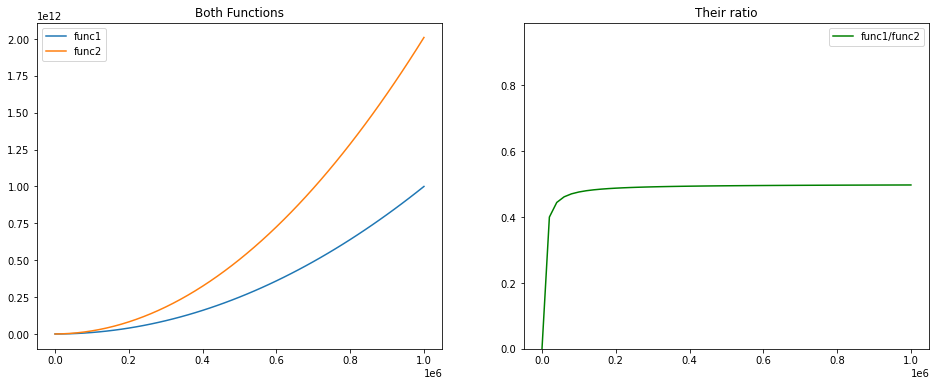

In [52]:
plotRatio(func1=x_squared, func2=x_squared2, maxN=1000000) # plotRatio has inputs functions x_squared and x_squared2

In the previous one, no matter how large you set the `maxN` parameter, the left plot titled "Both Functions" will always show both. One of the functions will never *completely* leave the other in the dust. The other way you can see this is by taking the 1st function and dividing it by the 2nd, as we do on the right in the "Their ratio" plot. On the right, we can see that **functions `x_squared` and `x_squared2` have the same order of growth because when $n$ is large, the ratio between the functions is basically constant.**  You should play around with the previous code cell and see what happens when you set the `maxN` parameter to smaller or larger numbers.

In the next one, we compare $f_2(x)$ with $f_3(x)$.

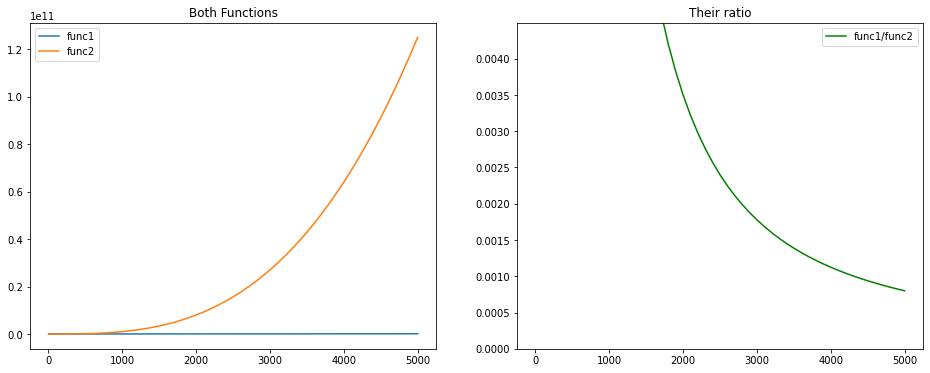

In [53]:
plotRatio(func1=x_squared2, func2=x_cubed, maxN=5000)

Note that this time, when $n$ is large (on the order of 5,000 or more), the `x_squared2` function (i.e., the blue-line `func1` trace) is just a flat line on the plot; this means that the `x_cubed` function has bascially run completely away and left `x_squared2` in the dust. In the right plot, we see that the ratio between the functions is getting steadily closer to 0. This means that the `x_cubed` function (i.e., the `func2` argument) is growing much much much faster than `x_squared2`.

**Because `x_squared2/x_cubed` is basically 0 when $n$ is large, this means that `x_cubed` has a *greater* order of growth than `x_squared2`.**

### Idea of the project: play with complexity, connect order of growth to simple algorithmic structures, and experiment with a limit test for order of growth.

- Deliverable #1: given algorithm pseudocode, implement a function that runs a single length-n `for` loop and returns the number of operations
- Deliverable #2: given algorithm pseudocode, implement a function that runs a double length-n `for` loop (triangle) and returns the number of operations
- Deliverable #3: perform timing on these loop functions
- Deliverable #4: Verify that the operation count and time of these have the same order of growth.
- Deliverable #5: A series of questions, looking for empirical justification for each (for each, a plot plus an answer suffices): 
    - which is more scalable, $\log n$ or $\sqrt{n}$?
    - which is more scalable, $n\log n$ or $n^{1.2}$?
    - which is more scalable, $100n^{10}$ or $2^n$?
- Deliverable #6: Really neat: actually pick an algorithm (built-in sorting?) and do an actual empirical timed complexity analysis!!

# Deliverable #1: How many operations in a single `for` loop?

Implement the following psuedocode as the function `one_dimensional_loop(n)` in the cell below:

1. Initialize `count=0`.
2. Repeat the following line $n$ times:
3. Increment `count` by 1.
4. Return `count`.

In [54]:
def one_dimensional_loop(n) :  # complete to satisfy the instructions and implement the pseudocode
    count = 0
    for iteration in range(n):
      count = count + 1
    return count

expectEqual(one_dimensional_loop(520),520)
expectEqual(one_dimensional_loop(45654),45654)

# Deliverable #2: How many operations in nested `for` loops?

Implement the following psuedocode as the function `two_dimensional_loop(n)` in the cell below:

```
count = 0
for i = 0 to n-1 :
    for j = i to n-1 :
        count = count + 1
return count
```

In [55]:
def two_dimensional_loop(n) :  # complete to satisfy the instructions and implement the pseudocode
    count = 0
    for i in range(n):
      for j in range(i, n):
        count = count + 1
    return count

expectEqual(two_dimensional_loop(520),135460)
expectEqual(two_dimensional_loop(1234),int(1234*(1234+1)/2))

# How much time does each loop take?

In algorithms, we often talk about the "time complexity" of an algorithm. When we do this, we're thinking about the *amount of time* an algorithm takes as a function of the *size of the input* of the algorithm, and then we're thinking about the order of growth of that funtion.

In this project, you'll check if the amount of time a `for`-loop takes is related to the operation counts that you worked out in Deliverables #1 and #2.

To see how long something takes in Python, you can use the `time` module and the `time.perf_counter_ns()` function. [See the documentation here](https://docs.python.org/3.8/library/time.html#time.perf_counter_ns). We provide an example of this in the next code cell; here, we're creating a function that returns the amount of time it takes to run our earlier `x_cubed` function when it gets an input of $n$:

In [56]:
import time
def time_x_cubed(n) :
    start_time = time.perf_counter_ns()
    x_cubed(n)
    end_time = time.perf_counter_ns()
    return end_time - start_time

print('Nanoseconds to run when n=1:                  '+str(time_x_cubed(1)))
print('Nanoseconds to run when n=100000000000000000: '+str(time_x_cubed(100000000000000000)))

Nanoseconds to run when n=1:                  3574
Nanoseconds to run when n=100000000000000000: 4504


# Deliverable #3: How long does it take to run your `for` loops?

The next code cell has 2 function shells in it and several `print` statements referencing those cells. In a similar fashion to our provided `time_x_cubed` function, your two functions should return the **number of nanoseconds your for-loop functions take to execute given an input $n$.** 

NOTE: since the execution time of these functions depend both on your implementation and on your system, we cannot provide assertion tests for these. However, in the printouts, you should expect the `Ratio:` to be *in the vicinity of 100* for both. That is, most of the time you run these, you should get something bigger than 50 and less than 200.

In [57]:
def alg_time_calc(function, n):
    
    #this function takes in a passed function and range n and calculates how long it takes to execute
    start_time = time.perf_counter_ns()
    function(n)
    end_time = time.perf_counter_ns()
    return end_time - start_time

def time_one_dimensional(n) : # complete to satisfy the instructions
    timeTaken = alg_time_calc(one_dimensional_loop, n)
    return timeTaken

def time_two_dimensional(n) : # complete to satisfy the instructions
    timeTaken = alg_time_calc(two_dimensional_loop, n)
    return timeTaken

### Don't modify the following code; we use it to verify that you've implemented things correctly:
one_dim_time10000 = time_one_dimensional(10000)
one_dim_time1000000 = time_one_dimensional(1000000)
print('Nanoseconds to run 1-dimensional loop when n=100:   '+str(one_dim_time10000))
print('Nanoseconds to run 1-dimensional loop when n=10000: '+str(one_dim_time1000000))
print('Ratio:                                              ' + str(round(one_dim_time1000000/one_dim_time10000)))

two_dim_time100 = time_two_dimensional(100)
two_dim_time1000 = time_two_dimensional(1000)
print('\nNanoseconds to run 2-dimensional loop when n=100 :  '+str(two_dim_time100))
print('Nanoseconds to run 2-dimensional loop when n=1000:  '+str(two_dim_time1000))
print('Ratio:                                              ' + str(round(two_dim_time1000/two_dim_time100)))

Nanoseconds to run 1-dimensional loop when n=100:   652118
Nanoseconds to run 1-dimensional loop when n=10000: 69555846
Ratio:                                              107

Nanoseconds to run 2-dimensional loop when n=100 :  275344
Nanoseconds to run 2-dimensional loop when n=1000:  35427253
Ratio:                                              129


# Deliverable #4: Do the count and timing orders-of-growth match?

 * Using the provided `plotRatio` function, compare the orders of growth of your functions `one_dimensional_loop` and `time_one_dimensional`.
 * Using the provided `plotRatio` function, compare the orders of growth of your functions `two_dimensional_loop` and `time_two_dimensional`. **Important: do not submit this notebook if the next 2 cells take more than 10 seconds (combined) to execute.**

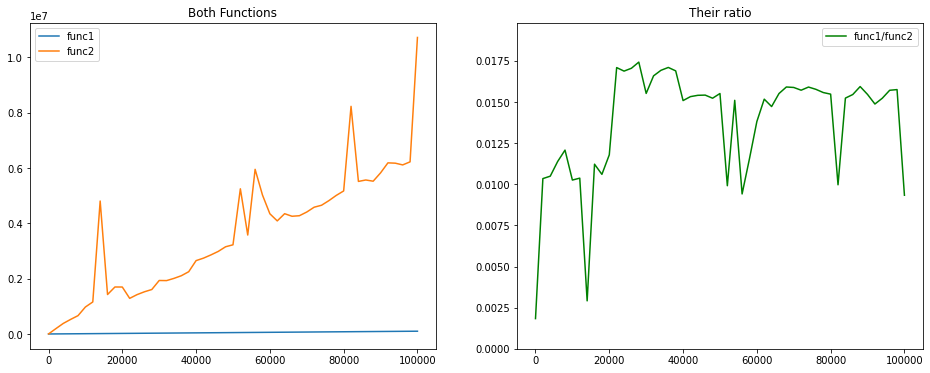

In [58]:
# Use this cell to compare the orders of growth of `one_dimensional_loop` and `time_one_dimensional`.
plotRatio(one_dimensional_loop, time_one_dimensional, 100000)

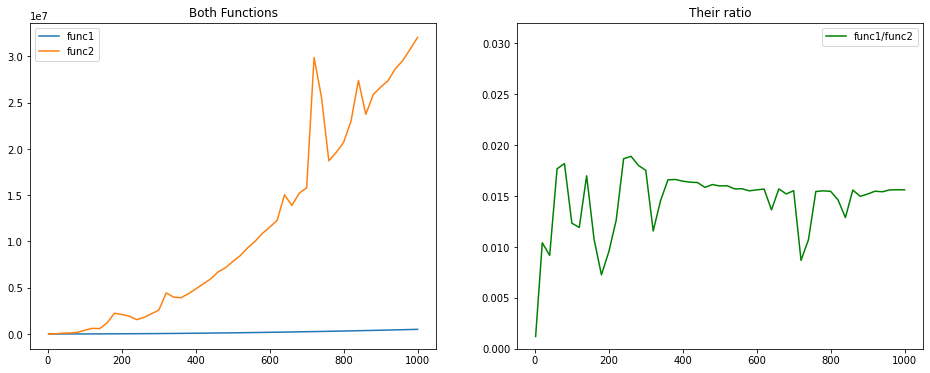

In [59]:
# Use this cell to compare the orders of growth of `two_dimensional_loop` and `time_two_dimensional`.
plotRatio(two_dimensional_loop, time_two_dimensional, 1000)

# What is the "time complexity" of these two functions?

We say that an algorithm has a *linear time complexity* if the order of growth of its running time is the same as that of the straight-line function $f(n)=n$.

Similarly, we say that an algorithm has a *quadratic time complexity* if the order of growth of its running time is the same as that of the quadratic function $f(n)=n^2$.

Finally, we say that an algorithm has a *cubic time complexity* if the order of growth of its running time is the same as that of the cubic function $f(n)=n^3$.

The next cell conveniently provides these three functions to you for use in Deliverable #5.

In [60]:
def linear(n) :
    return n

def quadratic(n) :
    return pow(n,2)

def cubic(n) :
    return pow(n,3)

# Deliverable #5: Determine the time complexity of your algorithms.

 * Using the provided `plotRatio` function, determine whether the time complexity of `time_one_dimensional` is **linear, quadratic, or cubic.** Provide a single call to `plotRatio` that supports your answer.
 * Using the provided `plotRatio` function, determine whether the time complexity of `time_two_dimensional` is **linear, quadratic, or cubic.** Provide a single call to `plotRatio` that supports your answer.
 
* **Important: do not submit this notebook if the next 2 cells take more than 10 seconds (combined) to execute.**

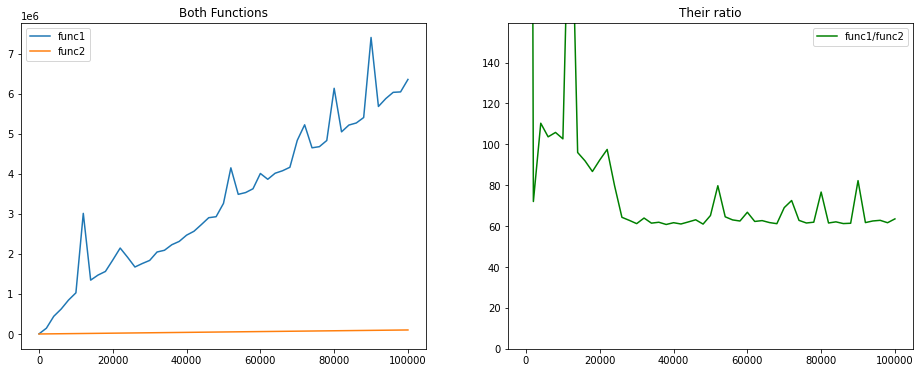

In [70]:
# Use this cell to determine the order of growth of `time_one_dimensional`. 
plotRatio(time_one_dimensional, linear, 100000)

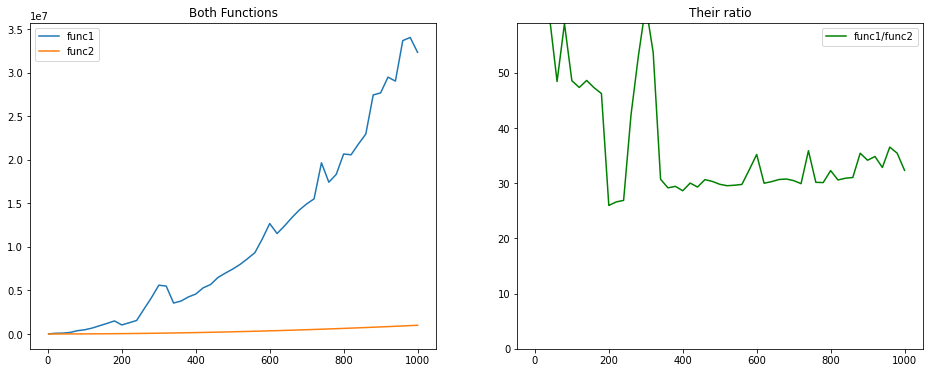

In [76]:
# Use this cell to determine the order of growth of `time_two_dimensional`.
plotRatio(time_two_dimensional, quadratic, 1000)

# Now for something new: how fast is Python's built-in sorting method?$^1$

First, a quick tutorial on sorting lists in Python. Suppose you have a list that is in some un-sorted order:

In [63]:
a_list = [54,124,2,23,3,7,1]

If you want to sort this list (in ascending) order, call its `.sort()` method:

In [64]:
a_list.sort()

When you call `a_list.sort()` on a Python list, it doesn't return anything; instead, it modifies the actual list object `a_list`. Now whenever you reference `a_list`, it has been changed to be in ascending order:

In [65]:
a_list

[1, 2, 3, 7, 23, 54, 124]

For more information, check out the Python documentation: https://docs.python.org/3.8/howto/sorting.html

For Deliverable #6, you are going to answer the question "what is the time complexity of sorting a list using `.sort()`?"

To do this, you'll need to create 2 functions:
1. `createUnsortedList(n)` will return a list containing $n$ integers; for full credit, this list of integers should not already be sorted (neither increasing nor decreasing). You may find it useful to import the `random` module and use the `random.randint(0,10)` function. Or you may come up with your own method of creating an unsorted list of arbitrary integers.
2. `sortTime(n)` will first call `createUnsortedList(n)` to obtain a list, then it will return how long it takes to *sort* that list.

# Deliverable #6: What is the time complexity of Python list sorting?

1. Fill in the following shell function definitions with code to implement the requested functionality.
2. Provide plots using `plotRatio` which illustrate the correct order of growth of the running time of the `.sort()` function. The order of growth could be the same as any of the following functions:
    * $f(n) = \sqrt{n}$
    * $f(n) = n$
    * $f(n) = n \log n$
    * $f(n) = n\sqrt{n}$
    * $f(n) = n^2$
    
(note: you may import the `math` module and use the methods `math.sqrt()` and `math.log()` for this)

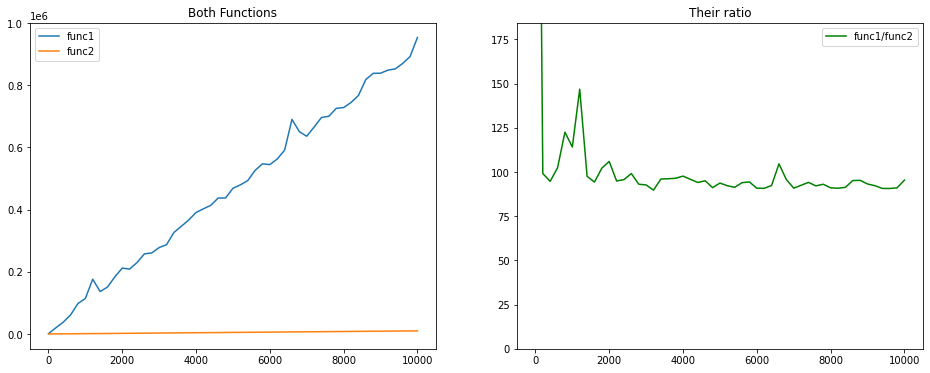

In [90]:
import random # use if you wish to generate arbitrary unsorted lists
import math   # use if you wish to access square-root and logarithm functions

def createUnsortedList(n) :
    # complete this function with code that returns an unsorted list of n integers
    to_return = []

    for num in range(n):
      to_return.append(random.randint(0,10))

    return to_return

def alg_time_calc_sort(sortFunction):
    
    #this function takes in a passed function and calculates how long it takes to sort
    start_time = time.perf_counter_ns()
    sortFunction()
    end_time = time.perf_counter_ns()
    return end_time - start_time

def sortTime(n) :
    # complete this function to determine the time taken to sort an unsorted list of n integers
    unsortedList = createUnsortedList(n)

    sorting_time = alg_time_calc_sort(unsortedList.sort)
    return sorting_time

# These tests only check simple/basic functionality; passing does not indicate a perfect implementation
l = createUnsortedList(100)
expectEqual(all(l[i] <= l[i+1] for i in range(len(l)-1)),False)
expectEqual(sortTime(100)==0,False)

Use the next code cell to call `plotRatio` to illustrate the order of growth of `.sort()`; clearly specify which order of growth you believe to be correct. **Important: ensure that the following cell takes no longer than 1 minute to run.**

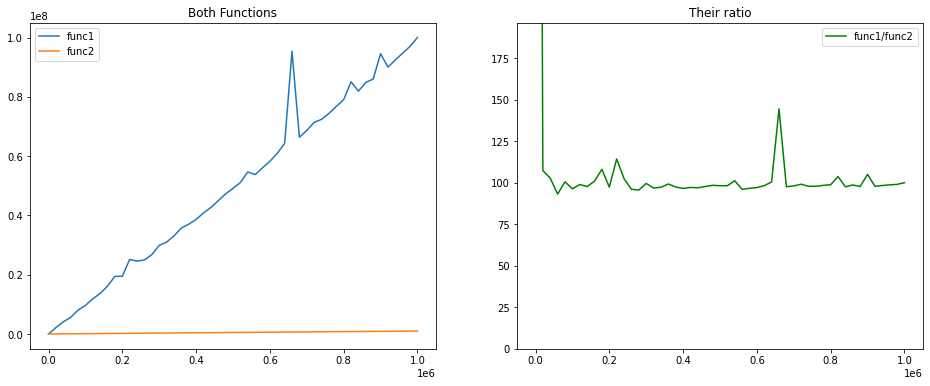

In [93]:
# Use this cell to determine the order of growth of `sortTime(n)`. 
n = 1000000
plotRatio(sortTime, linear, n)

$^1$ Python's built-in sorting method is called [Timsort.](https://en.wikipedia.org/wiki/Timsort)